In [1]:
using Plots

In [2]:
function derivativeAtPoint(f, x)
    delta = 1e-3
    return (f(x + delta) - f(x)) / delta
end

derivativeAtPoint (generic function with 1 method)

In [3]:
function secondDerivativeAtPoint(f, x)
    delta = 1e-3
    return (derivativeAtPoint(f, x + delta) - derivativeAtPoint(f, x)) / delta
end

secondDerivativeAtPoint (generic function with 1 method)

In [4]:
function findUnimodalIntervals(f, a, b, step)
    intervals = []
    actual_interval_start = a
    
    for x in a:step:b
        if secondDerivativeAtPoint(f, x) <= 0
            if abs(actual_interval_start - x) > step * 2
                push!(intervals, (actual_interval_start, x))
            end
            actual_interval_start = x
        end
    end
    if abs(actual_interval_start - b) > step * 2
        push!(intervals, (actual_interval_start, b))
    end

    return intervals
end

findUnimodalIntervals (generic function with 1 method)

In [5]:
function findExtrBySegments(f, a, b, step, eps)
    iters = []

    while abs(a - b) > eps
        x1 = a + (b - a) / 3
        x2 = a + (b - a) * 2 / 3

        push!(iters, (a, x1, x2, b))

        if f(x1) > f(x2)
            a = x1
        else
            b = x2
        end
    end

    return (a + b) / 2, iters
end

findExtrBySegments (generic function with 1 method)

In [6]:
function findExtrByGoldRatio(f, a, b, step, eps)
    iters = []

    goldRatio = (5^.5 - 1) / 2
    x1 = a + (1 - goldRatio) * (b - a)
    x2 = a + goldRatio * (b - a)
    x = (a + b) / 2

    while abs(a - b) > eps
        push!(iters, (a, x1, x2, b))

        if f(x1) > f(x2)
            x = x2
            a = x1
            x1 = x2
            x2 = a + b - x2
        else
            x = x1
            b = x2
            x2 = x1
            x1 = a + b - x1
        end
    end

    return x, iters
end

findExtrByGoldRatio (generic function with 1 method)

In [7]:
function findExtrByFibbonachi(f, a, b, step, eps)
    iters = []

    fib1, fib2, fib3 = 0, 1, 1
    for i in 1:16
        fib1 = fib2
        fib2 = fib3
        fib3 = fib1 + fib2
    end
    x1 = a + (fib1 / fib3) * (b - a)
    x2 = a + b - x1
    x = (a + b) / 2

    while abs(a - b) > eps
        push!(iters, (a, x1, x2, b))

        if f(x1) > f(x2)
            x = x2
            a = x1
            x1 = x2
            x2 = a + b - x2
        else
            x = x1
            b = x2
            x2 = x1
            x1 = a + b - x1
        end
    end

    return x, iters
end

findExtrByFibbonachi (generic function with 1 method)

In [8]:
f = x -> x ^ 4 - 2 * x ^ 2 + 3

#1 (generic function with 1 method)

In [9]:
intervals = findUnimodalIntervals(f, -10, 10, 2e-6)

2-element Vector{Any}:
 (-10, -0.57835)
 (0.57635, 10)

In [10]:
interval_index = 1
a = intervals[interval_index][1]
b = intervals[interval_index][2]
alg_step = 2e-3
alg_eps = 1e-3

0.001

23


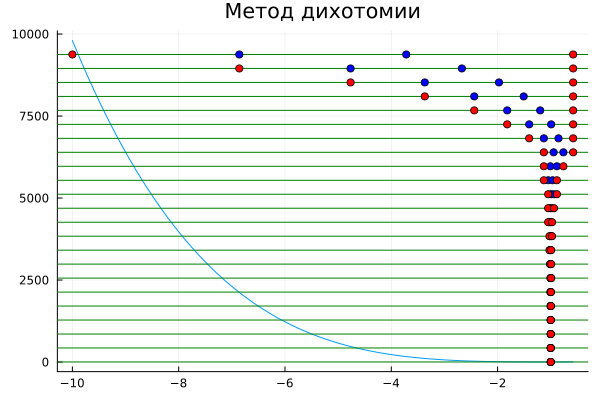

In [11]:
X = range(a, b, step=alg_step)
Y = [f(x) for x in X]
Y_min = minimum(Y)
Y_max = maximum(Y)
prop_Y = c -> Y_max - (Y_max - Y_min) * c

plot(X, Y, legend=false, title="Метод дихотомии")

x0, iters = findExtrBySegments(f, a, b, alg_step, alg_eps)
println(length(iters))
for (i, iter) in enumerate(iters)
    y_val = prop_Y(i / length(iters))

    hline!([y_val], color="green")
    scatter!([(iter[2], y_val), (iter[3], y_val)], color="blue")
    scatter!([(iter[1], y_val), (iter[4], y_val)], color="red")
end

plot!()

20


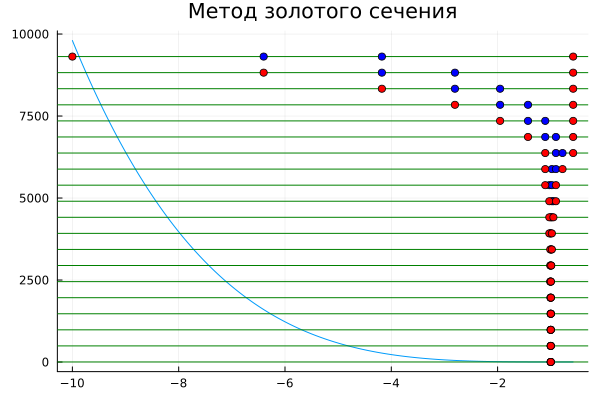

In [12]:
X = range(a, b, step=alg_step)
Y = [f(x) for x in X]
Y_min = minimum(Y)
Y_max = maximum(Y)
prop_Y = c -> Y_max - (Y_max - Y_min) * c

plot(X, Y, legend=false, title="Метод золотого сечения")

x0, iters = findExtrByGoldRatio(f, a, b, alg_step, alg_eps)
println(length(iters))
for (i, iter) in enumerate(iters)
    y_val = prop_Y(i / length(iters))

    hline!([y_val], color="green")
    scatter!([(iter[2], y_val), (iter[3], y_val)], color="blue")
    scatter!([(iter[1], y_val), (iter[4], y_val)], color="red")
end

plot!()

18


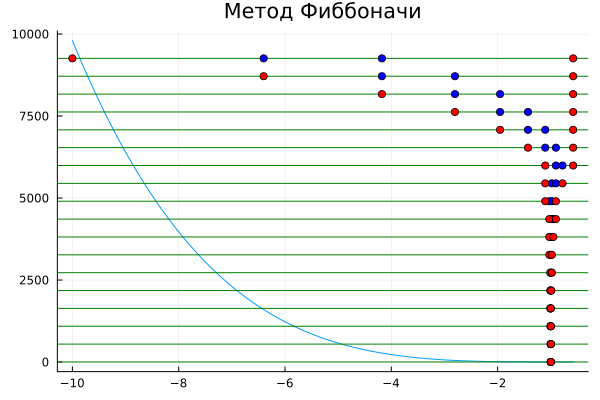

In [13]:
X = range(a, b, step=alg_step)
Y = [f(x) for x in X]
Y_min = minimum(Y)
Y_max = maximum(Y)
prop_Y = c -> Y_max - (Y_max - Y_min) * c

plot(X, Y, legend=false, title="Метод Фиббоначи")

x0, iters = findExtrByFibbonachi(f, a, b, alg_step, alg_eps)
println(length(iters))
for (i, iter) in enumerate(iters)
    y_val = prop_Y(i / length(iters))

    hline!([y_val], color="green")
    scatter!([(iter[2], y_val), (iter[3], y_val)], color="blue")
    scatter!([(iter[1], y_val), (iter[4], y_val)], color="red")
end

plot!()